In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, precision_score, precision_recall_fscore_support

### Canceling the errors that would happen

In [2]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [3]:
data = pd.read_csv("data.csv")
data

,Unnamed: 0,Timestamp,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,TOTFZ,...,MEANGBH,MEANJZH,TOTFY,MEANJZD,MEANALP,TOTFX,EPSY,EPSX,R_VALUE,y
0,211,2011-09-18 18:48:00,521.577973,7.177533e+09,1.087149e+23,1.135939e+13,135.896670,6.632328e+12,7.308394e+21,-2.781853e+24,...,53.309757,0.011486,3.581069e+23,-0.118468,0.029313,-1.191435e+24,-0.037569,0.124992,4.205628,0
1,483,2013-01-19 19:12:00,68.720701,4.536503e+08,3.647195e+21,1.524549e+12,8.145830,6.550310e+11,8.871888e+20,-3.599650e+23,...,53.546135,0.005599,5.951921e+22,0.123219,0.022481,1.765020e+23,-0.098792,-0.292965,0.000000,0
2,13,2015-08-28 20:24:00,1.392086,8.565190e+06,3.583830e+19,2.971721e+10,0.504336,4.622243e+10,1.845772e+19,-7.232051e+21,...,50.161461,0.016811,2.394274e+21,2.872488,0.071992,-2.788917e+21,-0.210486,0.245181,0.000000,0
3,54,2012-08-21 12:48:00,29.928768,3.735714e+08,1.961337e+21,7.062067e+11,0.889768,1.800335e+10,8.551239e+20,-3.736892e+23,...,27.843249,0.000624,-8.006764e+22,0.023472,0.002717,9.930680e+22,0.161388,-0.200167,0.000000,0
4,1196,2013-08-10 00:36:00,171.807698,1.830968e+09,1.058121e+22,3.736598e+12,27.444532,2.382311e+12,3.682769e+21,-1.789907e+24,...,35.353962,0.004794,-2.393241e+23,0.013323,0.017268,-5.358089e+23,0.098422,0.220352,2.339225,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32771,1030,2011-03-10 22:36:00,3648.958129,5.168071e+10,1.074018e+24,6.802454e+13,149.797828,6.331462e+12,3.750441e+22,-6.496276e+24,...,65.785527,0.002660,2.354783e+24,0.196798,0.005296,-2.904437e+24,-0.034309,0.042318,4.881052,3
32772,1180,2011-03-12 04:36:00,3250.813385,5.014434e+10,9.394192e+23,6.521174e+13,374.358212,1.979407e+13,4.255299e+22,-1.239655e+25,...,56.737438,-0.005924,1.904131e+24,0.051382,-0.012588,-4.953614e+24,-0.028593,0.074385,4.982162,3
32773,1069,2011-12-25 18:12:00,1249.472739,9.432249e+09,1.619687e+23,2.166068e+13,362.814133,1.775826e+13,8.178412e+21,-2.367918e+24,...,81.226574,0.027051,-9.018002e+23,-0.026191,0.064700,-1.323277e+24,0.071992,0.105639,4.518988,3
32774,1110,2011-12-26 02:24:00,1275.635512,1.014146e+10,1.594072e+23,2.223047e+13,259.205317,1.489449e+13,9.191594e+21,-3.183092e+24,...,78.985861,0.017641,-8.605322e+23,0.019128,0.041346,-1.435050e+24,0.063893,0.106550,4.513989,3


### Splitting TimeStamp column into Month, Day, Hour, and Minute

In [4]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data["Month"] = data["Timestamp"].dt.month
data["Day"] = data["Timestamp"].dt.day
data["Hour"] = data["Timestamp"].dt.hour
data["Minute"] = data["Timestamp"].dt.minute
data

,Unnamed: 0,Timestamp,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,TOTFZ,...,MEANALP,TOTFX,EPSY,EPSX,R_VALUE,y,Month,Day,Hour,Minute
0,211,2011-09-18 18:48:00,521.577973,7.177533e+09,1.087149e+23,1.135939e+13,135.896670,6.632328e+12,7.308394e+21,-2.781853e+24,...,0.029313,-1.191435e+24,-0.037569,0.124992,4.205628,0,9,18,18,48
1,483,2013-01-19 19:12:00,68.720701,4.536503e+08,3.647195e+21,1.524549e+12,8.145830,6.550310e+11,8.871888e+20,-3.599650e+23,...,0.022481,1.765020e+23,-0.098792,-0.292965,0.000000,0,1,19,19,12
2,13,2015-08-28 20:24:00,1.392086,8.565190e+06,3.583830e+19,2.971721e+10,0.504336,4.622243e+10,1.845772e+19,-7.232051e+21,...,0.071992,-2.788917e+21,-0.210486,0.245181,0.000000,0,8,28,20,24
3,54,2012-08-21 12:48:00,29.928768,3.735714e+08,1.961337e+21,7.062067e+11,0.889768,1.800335e+10,8.551239e+20,-3.736892e+23,...,0.002717,9.930680e+22,0.161388,-0.200167,0.000000,0,8,21,12,48
4,1196,2013-08-10 00:36:00,171.807698,1.830968e+09,1.058121e+22,3.736598e+12,27.444532,2.382311e+12,3.682769e+21,-1.789907e+24,...,0.017268,-5.358089e+23,0.098422,0.220352,2.339225,0,8,10,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32771,1030,2011-03-10 22:36:00,3648.958129,5.168071e+10,1.074018e+24,6.802454e+13,149.797828,6.331462e+12,3.750441e+22,-6.496276e+24,...,0.005296,-2.904437e+24,-0.034309,0.042318,4.881052,3,3,10,22,36
32772,1180,2011-03-12 04:36:00,3250.813385,5.014434e+10,9.394192e+23,6.521174e+13,374.358212,1.979407e+13,4.255299e+22,-1.239655e+25,...,-0.012588,-4.953614e+24,-0.028593,0.074385,4.982162,3,3,12,4,36
32773,1069,2011-12-25 18:12:00,1249.472739,9.432249e+09,1.619687e+23,2.166068e+13,362.814133,1.775826e+13,8.178412e+21,-2.367918e+24,...,0.064700,-1.323277e+24,0.071992,0.105639,4.518988,3,12,25,18,12
32774,1110,2011-12-26 02:24:00,1275.635512,1.014146e+10,1.594072e+23,2.223047e+13,259.205317,1.489449e+13,9.191594e+21,-3.183092e+24,...,0.041346,-1.435050e+24,0.063893,0.106550,4.513989,3,12,26,2,24


In [5]:
new_data = data
new_data = new_data.drop(["Unnamed: 0", "Timestamp"], axis=1)
new_data.columns

Index(['TOTUSJH', 'TOTBSQ', 'TOTPOT', 'TOTUSJZ', 'ABSNJZH', 'SAVNCPP',
       'USFLUX', 'TOTFZ', 'MEANPOT', 'EPSZ', 'MEANSHR', 'SHRGT45', 'MEANGAM',
       'MEANGBT', 'MEANGBZ', 'MEANGBH', 'MEANJZH', 'TOTFY', 'MEANJZD',
       'MEANALP', 'TOTFX', 'EPSY', 'EPSX', 'R_VALUE', 'y', 'Month', 'Day',
       'Hour', 'Minute'],
      dtype='object')

In [6]:
new_data = new_data.dropna()
new_data

,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,TOTFZ,MEANPOT,EPSZ,...,MEANALP,TOTFX,EPSY,EPSX,R_VALUE,y,Month,Day,Hour,Minute
0,521.577973,7.177533e+09,1.087149e+23,1.135939e+13,135.896670,6.632328e+12,7.308394e+21,-2.781853e+24,6918.602483,-0.291841,...,0.029313,-1.191435e+24,-0.037569,0.124992,4.205628,0,9,18,18,48
1,68.720701,4.536503e+08,3.647195e+21,1.524549e+12,8.145830,6.550310e+11,8.871888e+20,-3.599650e+23,1887.484970,-0.597485,...,0.022481,1.765020e+23,-0.098792,-0.292965,0.000000,0,1,19,19,12
2,1.392086,8.565190e+06,3.583830e+19,2.971721e+10,0.504336,4.622243e+10,1.845772e+19,-7.232051e+21,899.525590,-0.635787,...,0.071992,-2.788917e+21,-0.210486,0.245181,0.000000,0,8,28,20,24
3,29.928768,3.735714e+08,1.961337e+21,7.062067e+11,0.889768,1.800335e+10,8.551239e+20,-3.736892e+23,1036.393344,-0.753224,...,0.002717,9.930680e+22,0.161388,-0.200167,0.000000,0,8,21,12,48
4,171.807698,1.830968e+09,1.058121e+22,3.736598e+12,27.444532,2.382311e+12,3.682769e+21,-1.789907e+24,1391.704428,-0.736100,...,0.017268,-5.358089e+23,0.098422,0.220352,2.339225,0,8,10,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32771,3648.958129,5.168071e+10,1.074018e+24,6.802454e+13,149.797828,6.331462e+12,3.750441e+22,-6.496276e+24,14361.691248,-0.094651,...,0.005296,-2.904437e+24,-0.034309,0.042318,4.881052,3,3,10,22,36
32772,3250.813385,5.014434e+10,9.394192e+23,6.521174e+13,374.358212,1.979407e+13,4.255299e+22,-1.239655e+25,11193.985687,-0.186151,...,-0.012588,-4.953614e+24,-0.028593,0.074385,4.982162,3,3,12,4,36
32773,1249.472739,9.432249e+09,1.619687e+23,2.166068e+13,362.814133,1.775826e+13,8.178412e+21,-2.367918e+24,9093.373367,-0.189034,...,0.064700,-1.323277e+24,0.071992,0.105639,4.518988,3,12,25,18,12
32774,1275.635512,1.014146e+10,1.594072e+23,2.223047e+13,259.205317,1.489449e+13,9.191594e+21,-3.183092e+24,8169.300029,-0.236339,...,0.041346,-1.435050e+24,0.063893,0.106550,4.513989,3,12,26,2,24


In [7]:
new_data.columns

Index(['TOTUSJH', 'TOTBSQ', 'TOTPOT', 'TOTUSJZ', 'ABSNJZH', 'SAVNCPP',
       'USFLUX', 'TOTFZ', 'MEANPOT', 'EPSZ', 'MEANSHR', 'SHRGT45', 'MEANGAM',
       'MEANGBT', 'MEANGBZ', 'MEANGBH', 'MEANJZH', 'TOTFY', 'MEANJZD',
       'MEANALP', 'TOTFX', 'EPSY', 'EPSX', 'R_VALUE', 'y', 'Month', 'Day',
       'Hour', 'Minute'],
      dtype='object')

In [8]:
new_data

,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,TOTFZ,MEANPOT,EPSZ,...,MEANALP,TOTFX,EPSY,EPSX,R_VALUE,y,Month,Day,Hour,Minute
0,521.577973,7.177533e+09,1.087149e+23,1.135939e+13,135.896670,6.632328e+12,7.308394e+21,-2.781853e+24,6918.602483,-0.291841,...,0.029313,-1.191435e+24,-0.037569,0.124992,4.205628,0,9,18,18,48
1,68.720701,4.536503e+08,3.647195e+21,1.524549e+12,8.145830,6.550310e+11,8.871888e+20,-3.599650e+23,1887.484970,-0.597485,...,0.022481,1.765020e+23,-0.098792,-0.292965,0.000000,0,1,19,19,12
2,1.392086,8.565190e+06,3.583830e+19,2.971721e+10,0.504336,4.622243e+10,1.845772e+19,-7.232051e+21,899.525590,-0.635787,...,0.071992,-2.788917e+21,-0.210486,0.245181,0.000000,0,8,28,20,24
3,29.928768,3.735714e+08,1.961337e+21,7.062067e+11,0.889768,1.800335e+10,8.551239e+20,-3.736892e+23,1036.393344,-0.753224,...,0.002717,9.930680e+22,0.161388,-0.200167,0.000000,0,8,21,12,48
4,171.807698,1.830968e+09,1.058121e+22,3.736598e+12,27.444532,2.382311e+12,3.682769e+21,-1.789907e+24,1391.704428,-0.736100,...,0.017268,-5.358089e+23,0.098422,0.220352,2.339225,0,8,10,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32771,3648.958129,5.168071e+10,1.074018e+24,6.802454e+13,149.797828,6.331462e+12,3.750441e+22,-6.496276e+24,14361.691248,-0.094651,...,0.005296,-2.904437e+24,-0.034309,0.042318,4.881052,3,3,10,22,36
32772,3250.813385,5.014434e+10,9.394192e+23,6.521174e+13,374.358212,1.979407e+13,4.255299e+22,-1.239655e+25,11193.985687,-0.186151,...,-0.012588,-4.953614e+24,-0.028593,0.074385,4.982162,3,3,12,4,36
32773,1249.472739,9.432249e+09,1.619687e+23,2.166068e+13,362.814133,1.775826e+13,8.178412e+21,-2.367918e+24,9093.373367,-0.189034,...,0.064700,-1.323277e+24,0.071992,0.105639,4.518988,3,12,25,18,12
32774,1275.635512,1.014146e+10,1.594072e+23,2.223047e+13,259.205317,1.489449e+13,9.191594e+21,-3.183092e+24,8169.300029,-0.236339,...,0.041346,-1.435050e+24,0.063893,0.106550,4.513989,3,12,26,2,24


In [9]:
# def find_highest_value(row):
#     flare_columns = ["XFLARE", "MFLARE", "CFLARE", "BFLARE"]
#     numeric_row = row[flare_columns].astype(float)  # Convert to float to handle non-numeric values
#     max_column = numeric_row.idxmax()
#     max_val = row[max_column]
    
#     if max_val == 0:
#         return None
#     else:
#         return f"{max_column}{max_val}"  

# new_data['predicted_flare'] = new_data.apply(find_highest_value, axis=1)

### Checking if there is any NaN values

In [10]:
new_data["y"].unique()
new_data.isnull().any()

TOTUSJH    False
TOTBSQ     False
TOTPOT     False
TOTUSJZ    False
ABSNJZH    False
SAVNCPP    False
USFLUX     False
TOTFZ      False
MEANPOT    False
EPSZ       False
MEANSHR    False
SHRGT45    False
MEANGAM    False
MEANGBT    False
MEANGBZ    False
MEANGBH    False
MEANJZH    False
TOTFY      False
MEANJZD    False
MEANALP    False
TOTFX      False
EPSY       False
EPSX       False
R_VALUE    False
y          False
Month      False
Day        False
Hour       False
Minute     False
dtype: bool

In [11]:
new_data

,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,TOTFZ,MEANPOT,EPSZ,...,MEANALP,TOTFX,EPSY,EPSX,R_VALUE,y,Month,Day,Hour,Minute
0,521.577973,7.177533e+09,1.087149e+23,1.135939e+13,135.896670,6.632328e+12,7.308394e+21,-2.781853e+24,6918.602483,-0.291841,...,0.029313,-1.191435e+24,-0.037569,0.124992,4.205628,0,9,18,18,48
1,68.720701,4.536503e+08,3.647195e+21,1.524549e+12,8.145830,6.550310e+11,8.871888e+20,-3.599650e+23,1887.484970,-0.597485,...,0.022481,1.765020e+23,-0.098792,-0.292965,0.000000,0,1,19,19,12
2,1.392086,8.565190e+06,3.583830e+19,2.971721e+10,0.504336,4.622243e+10,1.845772e+19,-7.232051e+21,899.525590,-0.635787,...,0.071992,-2.788917e+21,-0.210486,0.245181,0.000000,0,8,28,20,24
3,29.928768,3.735714e+08,1.961337e+21,7.062067e+11,0.889768,1.800335e+10,8.551239e+20,-3.736892e+23,1036.393344,-0.753224,...,0.002717,9.930680e+22,0.161388,-0.200167,0.000000,0,8,21,12,48
4,171.807698,1.830968e+09,1.058121e+22,3.736598e+12,27.444532,2.382311e+12,3.682769e+21,-1.789907e+24,1391.704428,-0.736100,...,0.017268,-5.358089e+23,0.098422,0.220352,2.339225,0,8,10,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32771,3648.958129,5.168071e+10,1.074018e+24,6.802454e+13,149.797828,6.331462e+12,3.750441e+22,-6.496276e+24,14361.691248,-0.094651,...,0.005296,-2.904437e+24,-0.034309,0.042318,4.881052,3,3,10,22,36
32772,3250.813385,5.014434e+10,9.394192e+23,6.521174e+13,374.358212,1.979407e+13,4.255299e+22,-1.239655e+25,11193.985687,-0.186151,...,-0.012588,-4.953614e+24,-0.028593,0.074385,4.982162,3,3,12,4,36
32773,1249.472739,9.432249e+09,1.619687e+23,2.166068e+13,362.814133,1.775826e+13,8.178412e+21,-2.367918e+24,9093.373367,-0.189034,...,0.064700,-1.323277e+24,0.071992,0.105639,4.518988,3,12,25,18,12
32774,1275.635512,1.014146e+10,1.594072e+23,2.223047e+13,259.205317,1.489449e+13,9.191594e+21,-3.183092e+24,8169.300029,-0.236339,...,0.041346,-1.435050e+24,0.063893,0.106550,4.513989,3,12,26,2,24


In [12]:
new_data = new_data.dropna()

In [13]:
# new_data = new_data.drop(["XFLARE", "MFLARE", "CFLARE", "BFLARE"], axis=1)

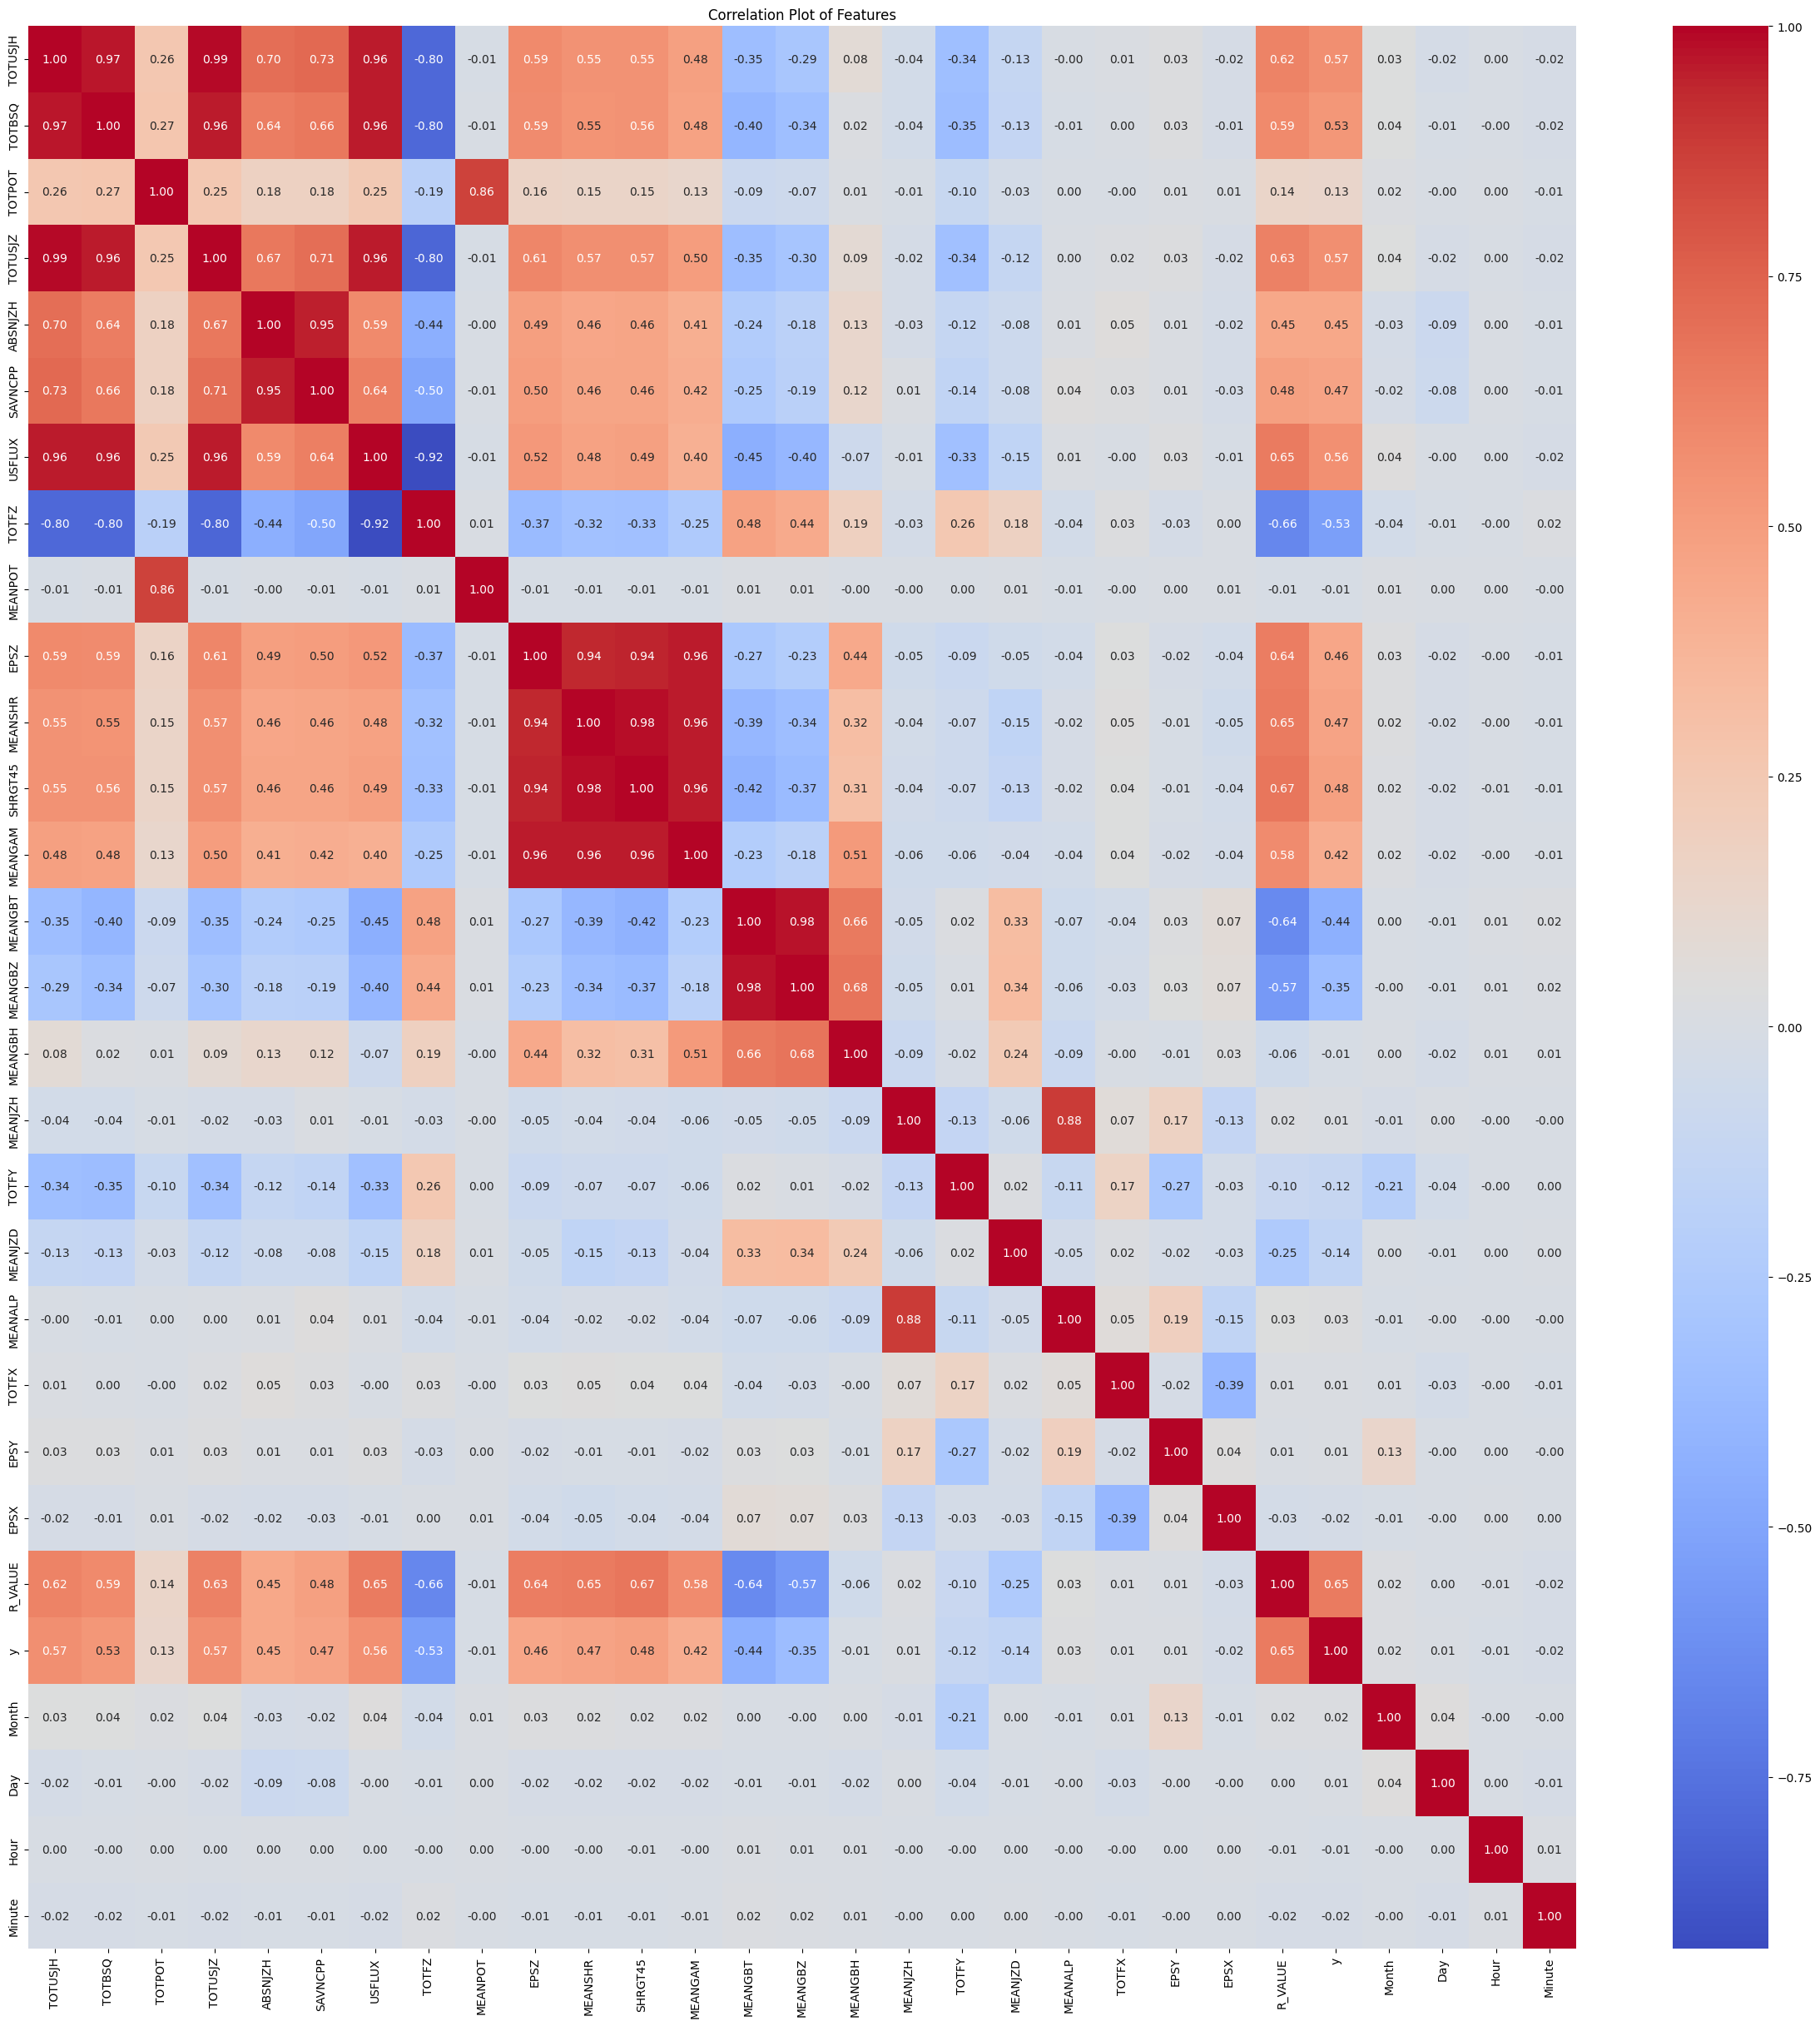

In [14]:
correlations = new_data.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Plot of Features')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support

# X = new_data.drop("predicted_flare", axis=1)
# y = new_data["predicted_flare"]
X = new_data.drop("y", axis=1)
y = new_data["y"]


### Selecting top 6 features based on highest correlation with the target column

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features = ["R_VALUE", "USFLUX", "TOTFZ", "TOTUSJH", "TOTBSQ", "TOTUSJZ"]

X = new_data[features]
X = scaler.fit_transform(X)

y = new_data["y"]

### Define kfold with 5

In [17]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


### Average is based on Weighted approach

In [18]:
precision_scorer = make_scorer(precision_score, average='weighted')
recall_scorer = make_scorer(recall_score, average='weighted')
fScore_scorer = make_scorer(f1_score, average='weighted')
accuracy_scorer = make_scorer(accuracy_score)

# Decision tree

In [19]:
dt = DecisionTreeClassifier(max_depth=10)


accuracy_results = cross_val_score(dt, X, y, cv=kfold)
precision_results = cross_val_score(dt, X, y, cv=kfold, scoring=precision_scorer)
recall_results = cross_val_score(dt, X, y, cv=kfold, scoring=recall_scorer)
fScore_results = cross_val_score(dt, X, y, cv=kfold, scoring=fScore_scorer)

print("Average accuracy: " + str(np.mean(accuracy_results)))
print("Average precision: " + str(np.mean(precision_results)))
print("Average recall: " + str(np.mean(recall_results)))
print("Average f_score: " + str(np.mean(fScore_results)))

Average accuracy: 0.7326052598761962
Average precision: 0.7070286643255718
Average recall: 0.7327603707804926
Average f_score: 0.7144685365660137


# KNN

In [20]:
knn = KNeighborsClassifier(n_neighbors=10)



accuracy_results = cross_val_score(knn, X, y, cv=kfold)
precision_results = cross_val_score(knn, X, y, cv=kfold, scoring=precision_scorer)
recall_results = cross_val_score(knn, X, y, cv=kfold, scoring=recall_scorer)
fScore_results = cross_val_score(knn, X, y, cv=kfold, scoring=fScore_scorer)
print("Average accuracy: " + str(np.mean(accuracy_results)))
print("Average precision: " + str(np.mean(precision_results)))
print("Average recall: " + str(np.mean(recall_results)))
print("Average f_score: " + str(np.mean(fScore_results)))


Average accuracy: 0.7447653293258527
Average precision: 0.7240835164896525
Average recall: 0.7447653293258527
Average f_score: 0.7295720859178099


# Naive bayes

In [21]:
naive_bayes = GaussianNB()



accuracy_results = cross_val_score(naive_bayes, X, y, cv=kfold)
precision_results = cross_val_score(naive_bayes, X, y, cv=kfold, scoring=precision_scorer)
recall_results = cross_val_score(naive_bayes, X, y, cv=kfold, scoring=recall_scorer)
fScore_results = cross_val_score(naive_bayes, X, y, cv=kfold, scoring=fScore_scorer)

print("Average accuracy: " + str(np.mean(accuracy_results)))
print("Average precision: " + str(np.mean(precision_results)))
print("Average recall: " + str(np.mean(recall_results)))
print("Average f_score: " + str(np.mean(fScore_results)))

Average accuracy: 0.6772653168169087
Average precision: 0.6977329385928567
Average recall: 0.6772653168169087
Average f_score: 0.6820229658656735


# Logistic Regression

In [22]:
lr = LogisticRegression(solver="lbfgs", max_iter=1000)



accuracy_results = cross_val_score(lr, X, y, cv=kfold)
precision_results = cross_val_score(lr, X, y, cv=kfold, scoring=precision_scorer)
recall_results = cross_val_score(lr, X, y, cv=kfold, scoring=recall_scorer)
fScore_results = cross_val_score(lr, X, y, cv=kfold, scoring=fScore_scorer)

print("Average accuracy: " + str(np.mean(accuracy_results)))
print("Average precision: " + str(np.mean(precision_results)))
print("Average recall: " + str(np.mean(recall_results)))
print("Average f_score: " + str(np.mean(fScore_results)))

Average accuracy: 0.7387163889488677
Average precision: 0.7032097131847429
Average recall: 0.7387163889488677
Average f_score: 0.7033145750898263


# Soft ensemble learning

### Used brute force to find the best weights

In [28]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score


# The commented code is brute force that calculate the best weight for each base learner based on the highest f-score macro
# fScore_scorer = make_scorer(f1_score, average='weighted')
# best_records =[0, 0, 0, 0, 0]
# for i in range(1, 5):
#     print(i)
#     for j in range(1, 5):
#         for k in range(1, 5):
#             for l in range(1, 5):
#                 ensemble_classifier = VotingClassifier(estimators=[
#                     ('lr', lg), 
#                     ('nv', naive_bayes), 
#                     ('knn', knn),
#                     ('dt', dt)], 
#                     voting='soft', weights=[i, j, k, l])
#                 fScore_results = cross_val_score(ensemble_classifier, X, y, cv=kfold, scoring=fScore_scorer)
#                 if np.mean(fScore_results) > best_records[0]:
#                     best_records[0] = np.mean(fScore_results)
#                     best_records[1] = i
#                     best_records[2] = j
#                     best_records[3] = k
#                     best_records[4] = l


# print(best_records)         


'''
After running the above code it looks that these weights are the best based on the highest f-score: [1, 1, 3, 2]

'''
ensemble_classifier = VotingClassifier(estimators=[
                    ('lr', lr), 
                    ('nv', naive_bayes), 
                    ('knn', knn),
                    ('dt', dt)], 
                    voting='soft', weights=[1, 1, 3, 2])


accuracy_results = cross_val_score(ensemble_classifier, X, y, cv=kfold)
print("Average accuracy: " + str(np.mean(accuracy_results)))
precision_results = cross_val_score(ensemble_classifier, X, y, cv=kfold, scoring=precision_scorer)
print("Average precision: " + str(np.mean(precision_results)))
recall_results = cross_val_score(ensemble_classifier, X, y, cv=kfold, scoring=recall_scorer)
print("Average recall: " + str(np.mean(recall_results)))
fScore_results = cross_val_score(ensemble_classifier, X, y, cv=kfold, scoring=fScore_scorer)
print("Average f_score: " + str(np.mean(fScore_results)))

print("Accuracy: " + str(accuracy_results))
print("Precision: " + str((precision_results)))
print("Recall: " + str((recall_results)))
print("F score: " + str((fScore_results)))
# print("Average f_score: " + str((fScore_results)))

zeros = 0
ones = 0
twos = 0
threes = 0
fours = 0
for train_index, test_index in kfold.split(X):
    # X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for item in y_test:
        if item == 0:
            zeros += 1
        elif item == 1:
            ones += 1
        elif item == 2:
            twos += 1
        elif item == 3:
            threes += 1
        else:
            fours += 1



    
    


Average accuracy: 0.7479604359424681
Average precision: 0.7288295894280956
Average recall: 0.7479294137616087
Average f_score: 0.7339295031504254
Accuracy: [0.74782878 0.74751861 0.75445944 0.75011633 0.73987901]
Precision: [0.72672203 0.72397708 0.73840759 0.72906511 0.72597613]
Recall: [0.74829404 0.74705335 0.75383899 0.75027144 0.74018924]
F score: [0.7346846  0.73249893 0.74139552 0.73450078 0.72656768]
Average number of type 0: 4050, type 1: 896, type 2: 1354, type 3: 137, type 4: 9 in each fold
